### Group 9 Member:
1. Apichaya Thaneerat
2. Radhika Vittal Shenoy
3. Rohan Ponramesh
4. Prakash K C


![gog](http://r.qcbs.ca/workshop03/book-en/images/gglayers.png)

____
# ICA Wed: Visualization Technicalities

In today's ICA we will explore the grammar of graphics (GoG), which is a less well-known, but increasingly popular, paradigm for producing visualizations.

We'll work with Altair today. But, there are many other GoG libraries out there and you should explore them! If I had to suggest perhaps the most obvious library to learn after ([before?](https://www.youtube.com/watch?v=jNiQaErXg8s)) Altair, it would be Plotly; as you have seen in some of the assignments, it is very powerful. Examine both for your projects.

Anyway, let's get to it!

We are going to walk through the steps of building a visualization **very slowly** - what might seem like ridiculously slow. But, the idea is that you appreciate how the "grammar" works.

Your first step is to rearrange the tables you are sitting at so that your group members can all look at one screen together. In the first part of this ICA you will:
* read what I wrote below and follow along (for the mpg dataset); you can have this shown on one of your group's laptops,
* mimic each step with a second laptop (e.g., the iris or penguin dataset - you pick one!).

Just to reiterate,
* have two laptops open,
* one is to follow along the ICA notebook you are given,
* the other is for you to explore a dataset with your group, making plots and answering questions,


I want to be sure you know how to perform these steps for your own dataset.


Unlike the previous ICAs, this ICA is a **group submission** (**one submission per group**). you turn in one notebook for your group - put the name of your group members you worked with. therefore, the expectation for the submission is also scaled up. Since the code for mpg already provided, you need to include the code for your dataset of choosing as well in, the submitted jupyter notebook.



_______
# <font color=#FFBB00> Part I: Altair </font>
_____


I'll use for today the "mpg" dataset and bring it in through `vega_datasets`, another place to get nice datasets. You get another dataset of your group's choosing.

In [82]:
pip install vega-datasets

In [83]:
import altair as alt
from vega_datasets import data
import seaborn as sns

cars = data.cars()

We are going to start with [`.Chart`](https://altair-viz.github.io/getting_started/starting.html#the-chart-object), although Altair has [other options](https://altair-viz.github.io/user_guide/API.html#top-level-objects). The way you get started is to call Altair through `alt` (or whatever you chose to call it in the `import` statement above), create a chart and pass the dataframe. Note that the dataframe is the natural container for Altair (as opposed to lists, dictionaries or arrays), just as it was for Seaborn. Basically, this means Altair keeps track of the columns names and can use them.  

Run this piece of code, which will generate an error.

In [84]:
alt.Chart(cars)

SchemaValidationError: ignored

alt.Chart(...)

What Altair is complaining about is that it is not possible to map the data onto a visual without knowing a minimal level of mapping. We need to use at least one more dot in the dot chain! Let's a `.mark_point` to map numbers to symbols.

Next, run this cell:


In [116]:
alt.Chart(cars).mark_point()

alt.Chart(...)

What do you see? This might not look like much - a circle in a square. Seems weird, right?

This result is expected in the GoG way of doing things: we have mapped the data onto a marker, _but have not given any more information_ about how it should be organized. Thus, we get a "0D" plot! Next time you need a 0D plot, you know how to make one!

Notice that in the GoG, nothing is taken for granted, very little is assumed for you. Think of this as starting with letters, then we can build words, then we can put words together, and so on.....

The next "dot" that we need is an encoding (`.encode()`) that maps the markers to some geometry; that is, to an axis (or more). Let's do a simple encoding next:


In [117]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower'
)

alt.Chart(...)

Gorgeous! Since we only encoded one variable to the $x$ axis, we get a 1D plot. I bet you have not seen many 0D and 1D plots before - welcome to GoG!


Interestingly, this is basically a "rug plot", which we saw in Seaborn and you made in the HW. In Altair's GoG, a rug plot is a very natural type of plot.

Do this with your dataset; compare the two monitors.

Make an "official" rug plot, try `mark_tick()`.

  But, let's keep going! Let's add an encoding to the $y$ axis.

In [118]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
)

alt.Chart(...)

At this point, we have a normal 2D scatter plot. Relative to `matplotlib`, the syntax looks maybe unusual; but, there is a nice logic to it.

Let's make two jumps now, adding a color and also getting some of the true power of Altair by making the plot interactive. Again, do this with your second dataset as well. Here's how you do that:

In [119]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

What interactions can you do? Can you pan? Zoom? Save a PNG? If you double click, it returns you to the default settings. Make sure all of this works for both datasets.

What if we want to do EDA on this dataset and put a categorical variable on the $x$ axis?

Simple:

In [120]:
alt.Chart(cars).mark_point().encode(
    x='Origin',
    y='Miles_per_Gallon',
    color='Cylinders',
).interactive()

alt.Chart(...)

Try this with the categorical variables in the second dataset as well.

What about the $y$ axis?

In [121]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders',
).interactive()

alt.Chart(...)

As you can see, it is very easy to make logical changes to the layout.

Notice how the `color` option works for real values (this case) and discrete categories (the case above with `color='Origin'`).

What does this next code do? That is, what is the ":O"? [hint](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types)

In [122]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon',
    color='Cylinders:O',
).interactive()

alt.Chart(...)

What happens if you change the ":O" to ":N"?

Again, compare and constrast the two datasets on the two monitors.

Ok, you get the idea: GoG is very nice for EDA!

There is a lot more to GoG, but we want to keep this fairly short.

____

But, now it is your turn. To complete this ICA you will need to use the [Altair docs](https://altair-viz.github.io/index.html).


Take your dataset and vary these options:
* change `mark_point` to several of the [other options](https://altair-viz.github.io/user_guide/marks.html) (e.g., bar),
* how do you change colors?
* vary the [encodings](https://altair-viz.github.io/user_guide/encoding.html),
* how do you export a PNG or PDF?
* for DS, tooltips are extremely useful - [make a plot with tooltips](https://altair-viz.github.io/gallery/scatter_tooltips.html)
* make a plot that uses [facets](https://altair-viz.github.io/user_guide/compound_charts.html),
* look through the gallery and attempt some of the styles, such as area charts, circular plots, and so on,
* discuss with your group members what their plans are for visualizations in their projects - list ideas from your discussion in a markdown cell of how Altair plots might be used among your group members. (Or, are your group members planning to not use Altair at all?)

If you like Altair and want to use it for your project, take a look at [this example](https://altair-viz.github.io/case_studies/exploring-weather.html). If you want an East Lansing weather dataset, let me know.

In [123]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [124]:
alt.Chart(penguins).mark_point()

alt.Chart(...)

In [125]:
alt.Chart(penguins).mark_point().encode(
    x='bill_length_mm')

alt.Chart(...)

In [126]:
alt.Chart(penguins).mark_point().encode(
    y='body_mass_g')

alt.Chart(...)

In [127]:
alt.Chart(penguins).mark_point().encode(x='bill_length_mm',
    y='body_mass_g',
    color='island'
    ).interactive()

alt.Chart(...)

🤔
We can interact with the visuallization by zooming in and out to capture different interesting part of the data. This interactive function allows us to explore the significant trend of the data and provide the scope of x and y axis range. Also, We can save thw visualization into .PNG and .SVG and code editor.



In [128]:
alt.Chart(penguins).mark_point().encode(x='sex',
    y='body_mass_g',
    color='species'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

In [129]:
alt.Chart(penguins).mark_point().encode(y='sex',
    x='body_mass_g',
    color='species'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

In [130]:
alt.Chart(penguins).mark_point().encode(y='sex',
    x='body_mass_g',
    color='bill_length_mm'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

🤔
For the discrete color it provides distinct color options for different unique values in the dataser, and for the real values for colur gives us a color gradient.

In [131]:
alt.Chart(penguins).mark_point().encode(y='sex',
    x='body_mass_g',
    color='bill_length_mm:O'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

In [132]:
alt.Chart(penguins).mark_point().encode(y='sex',
    x='body_mass_g',
    color='bill_length_mm:N'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

🤔
`:O` give us the every unique number in the `bill_length_mm` with the gradient color of the continuous range before while `:N` give us the same set of the discrete value in `bill_length_mm` with the non-gradient color (10 colors).
For mgp dataset that use cylinder as the color, it is more useful to use :N to identify the discrete number while in penguin dataset, `:O` and `:N` is not helpful to make the visualization easier to interpret.

In [133]:
alt.Chart(penguins).mark_bar().encode(x='sex',
    y='body_mass_g',
    color='species'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

In [134]:
alt.Chart(penguins).mark_arc().encode(x='sex',
    y='body_mass_g',
    color='species'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

In [135]:
alt.Chart(penguins).mark_circle(color='green').encode(x='sex',
    y='body_mass_g',
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

In [136]:
alt.Chart(penguins).mark_point().encode(x='bill_length_mm:Q',
    y='body_mass_g:Q', color='species:N'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

In [137]:
base=alt.Chart(penguins).mark_point().encode(x='bill_length_mm:Q',
    y='body_mass_g:Q', color='species', tooltip=['island','bill_depth_mm']
    ).interactive().properties(
    width=100,
    height=200
)

In [138]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [139]:
chart = alt.hconcat()
for species in ['Adelie', 'Chinstrap', 'Gentoo']:
    chart |= base.transform_filter(alt.datum.species == species)
chart

alt.HConcatChart(...)

In [140]:
alt.Chart(penguins).mark_area().encode(x='bill_length_mm',
    y='body_mass_g',
    color='species'
    ).interactive().properties(
    width=800,
    height=300
)

alt.Chart(...)

🤔 we dicussed with the team, and planned to utilize different types of plots and charts from various framework, especially the violin plots to find the distribution with the , histograms to visualize the distribution of a single continuous variable , heatmaps to represent the correlation matrix between multiple variable., Stacked plots to compare the composition of multiple categorical variables within different categories.

_______
# <font color=#FFBB00> Part II: Video on GoG </font>
_____


In [141]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/7wTIkbKaCGk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


As part of this ICA, watch the video above on your own time; put a comment in your HW for this week that you have watched it.



_______
# <font color=#FFBB00> Part III: Telling a Story </font>
_____


Next, we will practice telling a story with data. The instructions are simple:
1. with your group, choose a dataset (just one), _[read the instructions first to be sure you pick a "good enough" dataset]_
2. each person in your group then works alone for $15$ minutes, thinking about what the dataset tells them (with **no** communication among group members),
3. based on the story you have found in the dataset, make $2-3$ visualizations,
4. present your story to the rest of the group: put your visualizations on a laptop so that all can see (practice for your project presentation!),
5. use good visualization practices: it's your choice, but perhaps remove spines, darken the grid, make some lines gray, use arrows, add annotations, and so on -- the choices you make should reflect the specific story you wish to tell.

Each student will likely arrive at a different narrative, even though the dataset is the same. So, each visualizations will be completely different to reflect that unique narrative.

If you have a large group, you should think carefully about timing. You may need to use two laptops and have two subgroups presenting.

___

In case you need a start: suppose your group picks the penguins dataset. One group member might focus on a story about the female penguins. Another might focus on the island with the most diverse penguin population. Yet another could focus on the smallest of the penguins.

Another good dataset is the one from Wed: there are many narratives possible in the `mpg` (cars) dataset.

Feel free to use any visualization library you wish: Plotly, Altair, matplotlib, Seaborn, etc...or any combination.

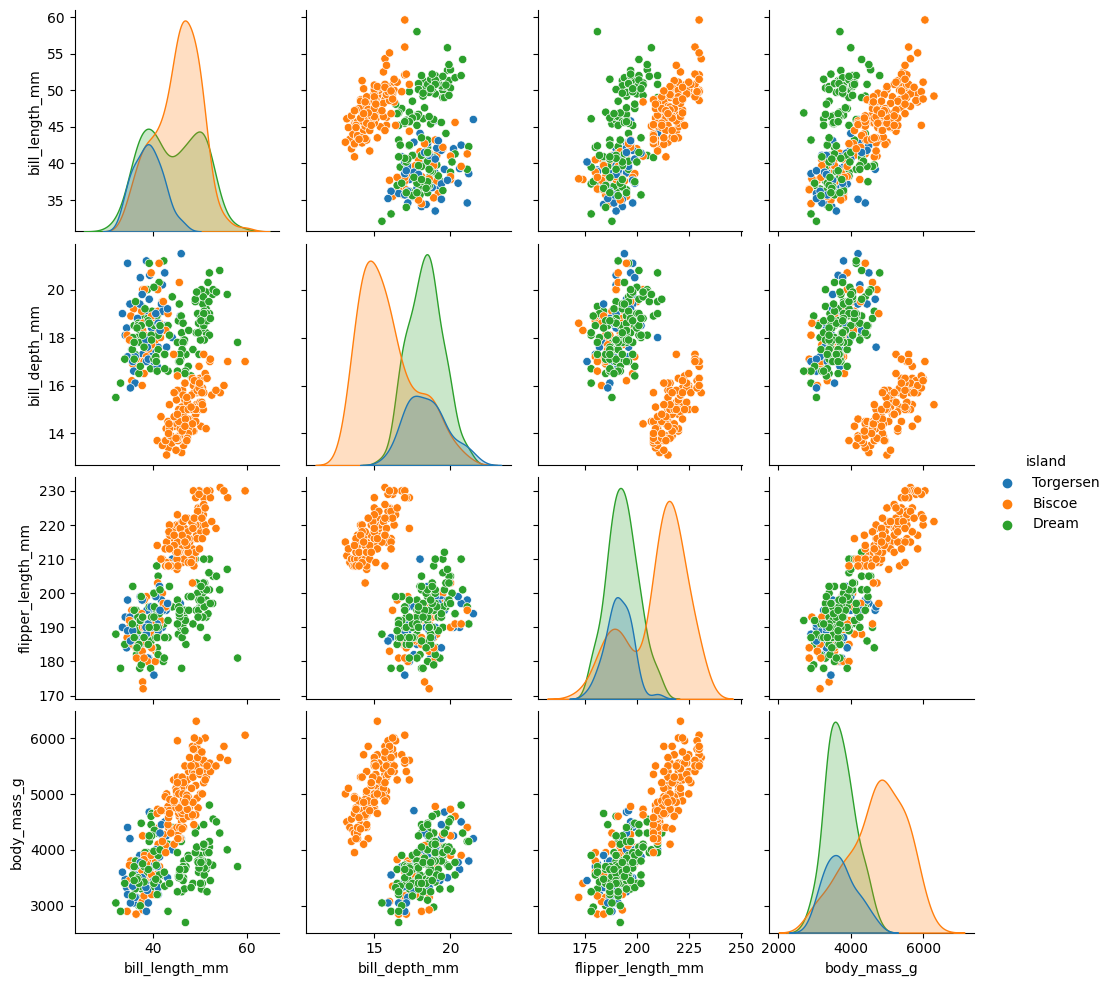

In [111]:
import matplotlib.pyplot as plt

sns.pairplot(penguins,hue='island')

🤔 From the pair plot, we spot out the correlation between `body_mass_g` and `flipper_length_mm` that the penguin in `Biscoe` has higher value in both of the variable compare to other islands.

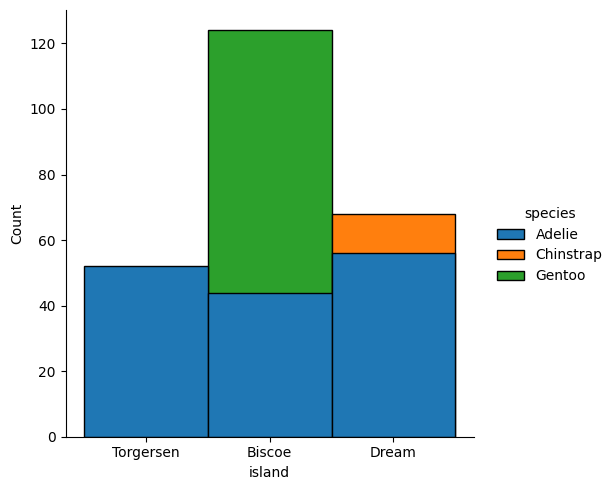

In [112]:
sns.displot(penguins, x="island", hue="species",alpha=1)

🤔 From the displot between island plotted as a parameter on the x-axis and species being the hue, we can see that the penguin species 'Adelie' is almost equally prevelant on all 3 islands. Biscoe island is diverse and seems to be have the highest population density where a large proportion of Gentoo species is seen. The Dream island also has a small proportion of Chinstrap species.

In [113]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

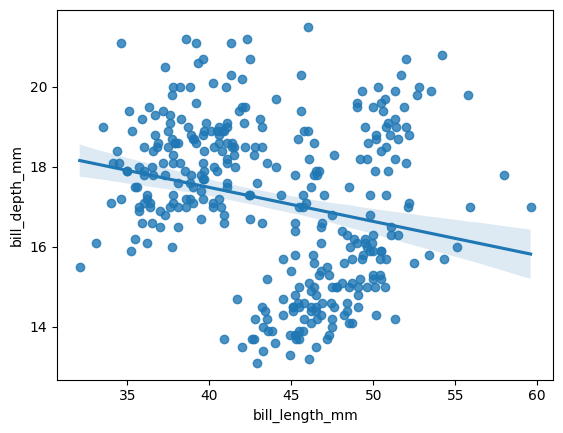

In [114]:
sns.regplot(penguins,x='bill_length_mm',y='bill_depth_mm')

🤔 the bill length and depth have anegative correlation

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

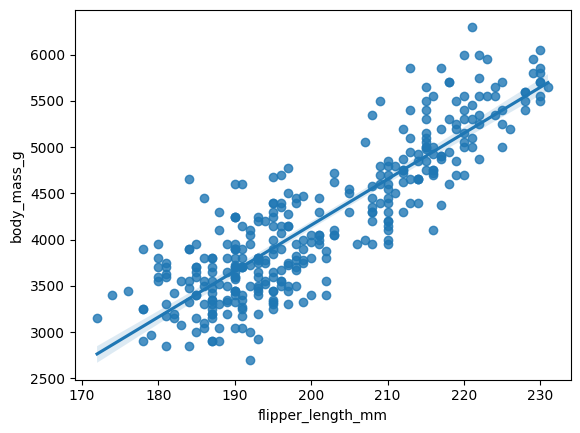

In [115]:
sns.regplot(penguins,x='flipper_length_mm',y='body_mass_g')

🤔 the Body_mass has a positive correlation with the flipper length